In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
from datetime import datetime
import warnings
from celluloid import Camera # getting the camera
from IPython.display import HTML
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
temp_city = pd.read_csv('./input/GlobalLandTemperaturesByCity.csv')
temp_country = pd.read_csv('./input/GlobalLandTemperaturesByCountry.csv')
temp_global = pd.read_csv('./input/GlobalTemperatures.csv')
ghg = pd.read_csv('./input/greenhouse_gas_inventory_data_data.csv')

In [4]:
def clean_data(df, temp):
    df = df[df[temp].notna()]
    df['dt'] = pd.to_datetime(df['dt'], dayfirst=True)
    df['Year'] = df['dt'].dt.year
    df['Month'] = df['dt'].dt.month
    return df

In [5]:
temp_city = clean_data(temp_city, 'AverageTemperature')
temp_country = clean_data(temp_country, 'AverageTemperature')
temp_global = clean_data(temp_global, 'LandAverageTemperature')

## Is it getting warmer?

In [6]:
temp_global = temp_global.groupby(by=['Year']).mean().reset_index()
temp_global

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Month
0,1750,8.72,2.64,nan,nan,nan,nan,nan,nan,6.09
1,1751,7.98,2.78,nan,nan,nan,nan,nan,nan,4.71
2,1752,5.78,2.98,nan,nan,nan,nan,nan,nan,6.83
3,1753,8.39,3.18,nan,nan,nan,nan,nan,nan,6.50
4,1754,8.47,3.49,nan,nan,nan,nan,nan,nan,6.50
...,...,...,...,...,...,...,...,...,...,...
261,2011,9.52,0.08,15.28,0.11,3.83,0.14,15.77,0.06,6.50
262,2012,9.51,0.08,15.33,0.11,3.76,0.15,15.80,0.06,6.50
263,2013,9.61,0.10,15.37,0.12,3.91,0.15,15.85,0.06,6.50
264,2014,9.57,0.09,15.31,0.11,3.88,0.14,15.91,0.06,6.50


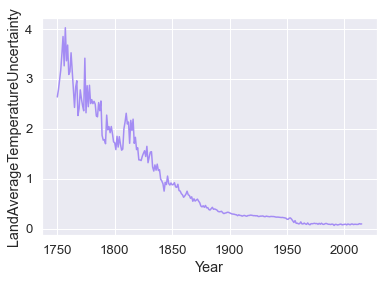

In [7]:
clrs = sns.color_palette("husl", 4)
sns.set(font_scale=1.2)
with sns.axes_style("darkgrid"):
    sns.lineplot(x=temp_global.Year, y = temp_global.LandAverageTemperatureUncertainty, 
                 ci = None, color =clrs[3])

In [8]:
#temp_global = temp_global[temp_global.Year>=1850]

In [9]:
min_year = temp_global['Year'].min()
max_year = temp_global['Year'].max()

In [10]:
temp_global

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Month
0,1750,8.72,2.64,nan,nan,nan,nan,nan,nan,6.09
1,1751,7.98,2.78,nan,nan,nan,nan,nan,nan,4.71
2,1752,5.78,2.98,nan,nan,nan,nan,nan,nan,6.83
3,1753,8.39,3.18,nan,nan,nan,nan,nan,nan,6.50
4,1754,8.47,3.49,nan,nan,nan,nan,nan,nan,6.50
...,...,...,...,...,...,...,...,...,...,...
261,2011,9.52,0.08,15.28,0.11,3.83,0.14,15.77,0.06,6.50
262,2012,9.51,0.08,15.33,0.11,3.76,0.15,15.80,0.06,6.50
263,2013,9.61,0.10,15.37,0.12,3.91,0.15,15.85,0.06,6.50
264,2014,9.57,0.09,15.31,0.11,3.88,0.14,15.91,0.06,6.50


In [11]:
fig, ax = plt.subplots(figsize=(10, 6)) # let's make it bigger

plt.xlim(min_year, max_year)
ax.grid(False)
ax.set_ylabel('Average Temperature / Uncertainty')
ax.set_xlabel('Year')
ax.set_title('Average Land Temperature (& its Uncertainty) on Earth 1850-2015')

camera = Camera(fig)# the camera gets our figure
x = temp_global.Year
y1 = temp_global.LandAverageTemperature
y2 = temp_global.LandAndOceanAverageTemperature
y11 = temp_global.LandAndOceanAverageTemperatureUncertainty
y22 = temp_global.LandAverageTemperatureUncertainty
for i in range(len(x)):
    x_t = x[:i] # current year
    y_t1 = y1[:i] # current land temp
    ax.plot(x_t, y_t1, c='b')
    y_t2 = y2[:i] # current ocean-land temp
    ax.plot(x_t, y_t2, c='c')
    y_t11 = y11[:i] # current land temperature error
    ax.plot(x_t, y_t11, c='r')
    y_t22 = y22[:i] # current land ocean temperature error
    ax.plot(x_t, y_t22, c='m')
    camera.snap()

ax.legend(['Average Temperature','Temperature Uncertainty'], loc='left')
animation = camera.animate(interval=10, repeat = False)
plt.close() #Stop the empty plot from displaying
animation.save('global_temp.gif', writer='pillow')
HTML(animation.to_html5_video())

In [12]:
#temp_country.Country.value_counts()
#temp_city.shape
#temp_city.describe()
#temp_city['temp_top'] = temp_city['AverageTemperature'] + temp_city['AverageTemperatureUncertainty']
#temp_city['temp_bottom'] = temp_city['AverageTemperature'] - temp_city['AverageTemperatureUncertainty']

## What about Greece?

In [52]:
ghg

,year,country_or_area,value
0,1990,Australia,1255869.15
1,1990,Austria,236533.88
2,1990,Belarus,400371.49
3,1990,Belgium,438063.71
4,1990,Bulgaria,206901.57
...,...,...,...
1069,2014,Switzerland,145972.03
1070,2014,Turkey,1402651.13
1071,2014,Ukraine,1063042.61
1072,2014,United Kingdom,1055001.50


In [13]:
ghg_greece = ghg[ghg['country_or_area']=='Greece']

In [14]:
ghg_greece

,country_or_area,year,value,category
375,Greece,2014,79628.27,carbon_dioxide_co2_emissions_without_land_use_...
376,Greece,2013,82910.63,carbon_dioxide_co2_emissions_without_land_use_...
377,Greece,2012,90710.57,carbon_dioxide_co2_emissions_without_land_use_...
378,Greece,2011,94102.94,carbon_dioxide_co2_emissions_without_land_use_...
379,Greece,2010,97035.08,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
7688,Greece,1994,3.29,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7689,Greece,1993,3.20,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7690,Greece,1992,3.11,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7691,Greece,1991,3.02,sulphur_hexafluoride_sf6_emissions_in_kilotonn...


In [15]:
ghg_greece = ghg_greece.groupby(by=['year']).sum().reset_index()
ghg_greece

,year,value
0,1990,314149.48
1,1991,314303.53
2,1992,318052.62
3,1993,316695.96
4,1994,325207.68
5,1995,332112.33
6,1996,341529.14
7,1997,356047.36
8,1998,372866.68
9,1999,373387.93


No handles with labels found to put in legend.


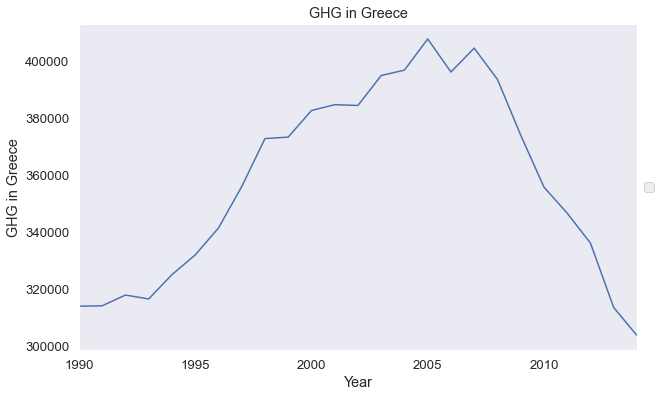

In [18]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set(font_scale=1.2)
with sns.axes_style("darkgrid"):
    sns.lineplot(x=ghg_greece.year, y = ghg_greece.value)
plt.xlim(1990, 2014)
ax.grid(False)
ax.set_ylabel('GHG in Greece')
ax.set_xlabel('Year')
ax.set_title('GHG in Greece')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [19]:
ghg = ghg.groupby(by=['year', 'country_or_area']).sum().reset_index()

In [20]:
ghg

,year,country_or_area,value
0,1990,Australia,1255869.15
1,1990,Austria,236533.88
2,1990,Belarus,400371.49
3,1990,Belgium,438063.71
4,1990,Bulgaria,206901.57
...,...,...,...
1069,2014,Switzerland,145972.03
1070,2014,Turkey,1402651.13
1071,2014,Ukraine,1063042.61
1072,2014,United Kingdom,1055001.50


In [21]:
keep_cols = ['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Month']
gr = temp_country[temp_country.Country == 'Greece'][keep_cols]
gr

,Year,AverageTemperature,AverageTemperatureUncertainty,Month
206656,1743,10.81,2.13,11
206661,1744,15.31,2.22,4
206662,1744,16.51,2.08,5
206663,1744,21.25,2.11,6
206664,1744,23.94,2.12,7
...,...,...,...,...
209889,2013,15.17,0.29,4
209890,2013,20.50,0.44,5
209891,2013,23.10,0.40,6
209892,2013,25.55,0.41,7


In [22]:
#gr = temp_city[temp_city['Country'] == 'Greece']

In [23]:
gr.describe()

,Year,AverageTemperature,AverageTemperatureUncertainty,Month
count,3166.00,3166.00,3166.00,3166.00
mean,1881.22,14.77,1.46,6.49
std,76.22,6.85,1.40,3.45
min,1743.00,1.22,0.09,1.00
25%,1815.00,8.46,0.38,3.00
50%,1881.00,14.37,0.89,6.00
75%,1947.00,21.23,2.15,9.00
max,2013.00,28.43,9.33,12.00


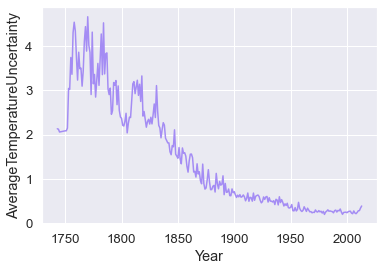

In [24]:
clrs = sns.color_palette("husl", 4)
sns.set(font_scale=1.2)
with sns.axes_style("darkgrid"):
    sns.lineplot(x=gr.Year, y = gr.AverageTemperatureUncertainty, 
                 ci = None, color =clrs[3])

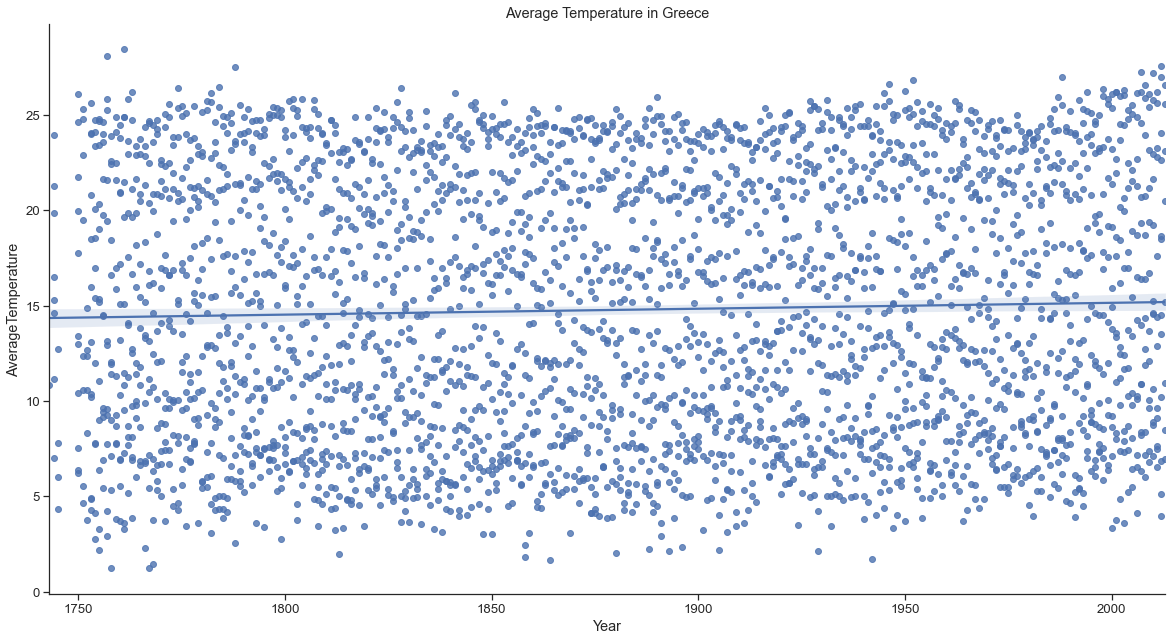

In [25]:
title = 'Average Temperature in Greece'

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
sns.regplot(data=gr, x="Year", y="AverageTemperature").set(title=title)
sns.despine()
#plt.plot(, 30) 

In [26]:
gr = gr[gr.Year>=1850]

In [27]:
def get_season(month):
    if month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'

In [28]:
min_year = gr['Year'].min()
max_year = gr['Year'].max()
years = range(min_year, max_year + 1)

In [29]:
gr['season'] = gr['Month'].apply(get_season)

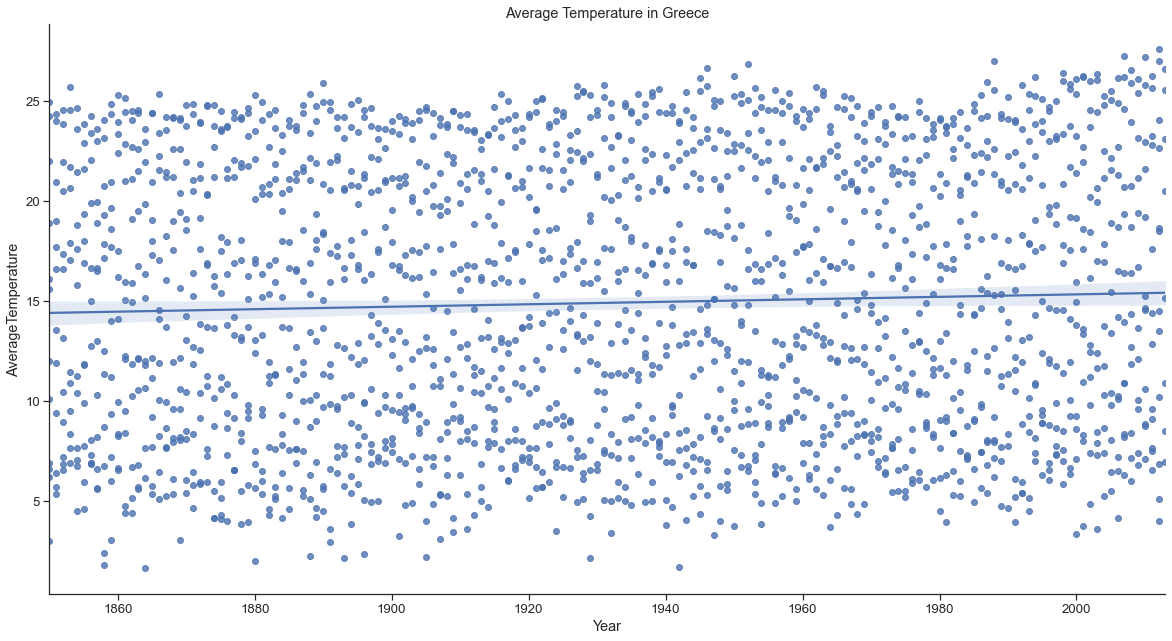

In [30]:
title = 'Average Temperature in Greece'
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
sns.regplot(data=gr, x="Year", y="AverageTemperature").set(title=title)
sns.despine()

## Are all seasons affected the same? 

In [31]:
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

In [35]:
temp_global = pd.read_csv('./input/GlobalTemperatures.csv')
temp_global = clean_data(temp_global, 'LandAverageTemperature')

In [37]:
temp_global['season'] = temp_global['Month'].apply(get_season)

In [38]:
temp_global

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month,season
0,1750-01-01,3.03,3.57,nan,nan,nan,nan,nan,nan,1750,1,Winter
1,1750-02-01,3.08,3.70,nan,nan,nan,nan,nan,nan,1750,2,Winter
2,1750-03-01,5.63,3.08,nan,nan,nan,nan,nan,nan,1750,3,Spring
3,1750-04-01,8.49,2.45,nan,nan,nan,nan,nan,nan,1750,4,Spring
4,1750-05-01,11.57,2.07,nan,nan,nan,nan,nan,nan,1750,5,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.76,0.07,20.70,0.11,9.00,0.17,17.59,0.06,2015,8,Summer
3188,2015-09-01,13.00,0.08,18.84,0.09,7.20,0.23,17.05,0.06,2015,9,Autumn
3189,2015-10-01,10.80,0.10,16.45,0.06,5.23,0.12,16.29,0.06,2015,10,Autumn
3190,2015-11-01,7.43,0.12,12.89,0.09,2.16,0.11,15.25,0.06,2015,11,Autumn


(1850.0, 2013.0)

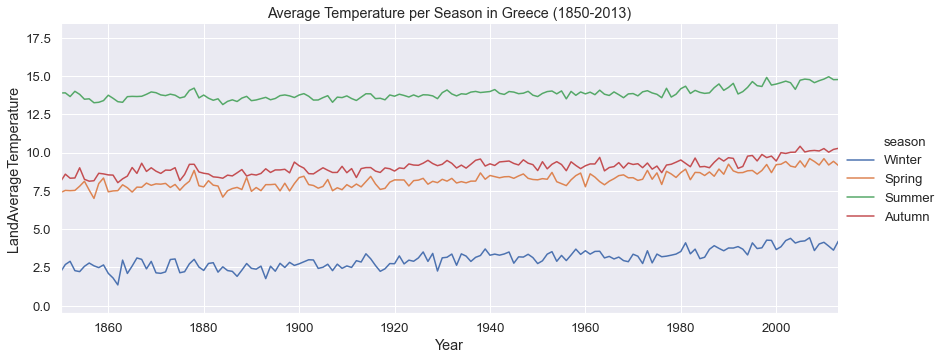

In [44]:
title = 'Average Temperature per Season in Greece (1850-2013)'

with sns.axes_style("darkgrid"):
    sns.relplot(data=temp_global, x="Year", y="LandAverageTemperature", hue="season", ci= None, 
                height=5, aspect=2.4, kind="line").set(title=title)
#t = plt.plot(range(i, i + 5))
#plt.legend(title='Season', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(1850, max_year)

In [45]:
gr

,Year,AverageTemperature,AverageTemperatureUncertainty,Month,season
207930,1850,3.00,1.32,1,Winter
207931,1850,6.18,1.08,2,Winter
207932,1850,6.89,2.61,3,Spring
207933,1850,11.99,1.67,4,Spring
207934,1850,16.11,1.02,5,Spring
...,...,...,...,...,...
209889,2013,15.17,0.29,4,Spring
209890,2013,20.50,0.44,5,Spring
209891,2013,23.10,0.40,6,Summer
209892,2013,25.55,0.41,7,Summer


In [46]:
gr = gr.groupby(by=['Year', 'season']).mean().reset_index()

In [47]:
gr

,Year,season,AverageTemperature,AverageTemperatureUncertainty,Month
0,1850,Autumn,14.85,1.59,10.00
1,1850,Spring,11.66,1.77,4.00
2,1850,Summer,23.72,1.17,7.00
3,1850,Winter,5.26,1.34,5.00
4,1851,Autumn,15.82,1.65,10.00
...,...,...,...,...,...
650,2012,Summer,26.21,0.38,7.00
651,2012,Winter,5.31,0.36,5.00
652,2013,Spring,15.53,0.37,4.00
653,2013,Summer,25.08,0.42,7.00


    fig, ax = plt.subplots(figsize=(10, 6)) # let's make it bigger
    camera = Camera(fig)# the camera gets our figure

    x = gr.Year
    y = gr.AverageTemperature
    for i in range(len(x)):
        x_t = x[:i] # current year
        y_t = y[:i] # current temp
        sns.relplot(data=gr, x="Year", y="AverageTemperature", hue="season", ci= None, 
                height=5, aspect=2.4, kind="line").set(title=title)
        camera.snap()
    animation = camera.animate(blit=False, interval=20)
    plt.close() #Stop the empty plot from displaying
    animation.save('gr_temp_seasons.gif', writer='pillow')
    HTML(animation.to_html5_video())

In [48]:
gr = gr.groupby(by=['Year','season']).mean()
gr

AverageTemperature  AverageTemperatureUncertainty  Month
Year season                                                          
1850 Autumn               14.85                           1.59  10.00
     Spring               11.66                           1.77   4.00
     Summer               23.72                           1.17   7.00
     Winter                5.26                           1.34   5.00
1851 Autumn               15.82                           1.65  10.00
...                         ...                            ...    ...
2012 Summer               26.21                           0.38   7.00
     Winter                5.31                           0.36   5.00
2013 Spring               15.53                           0.37   4.00
     Summer               25.08                           0.42   7.00
     Winter                7.70                           0.38   1.50

[655 rows x 3 columns]

In [49]:
gr = gr[['AverageTemperature', 'AverageTemperatureUncertainty']]

In [50]:
#from scipy.interpolate import make_interp_spline
#a_BSpline = make_interp_spline(list(data.index), list(data[season]))
#y_new = a_BSpline(data.index)

    plt.figure(figsize=(18,8))
    sns.set(font_scale=2)
    ax = sns.violinplot(data=data, order = seasons)
    #ax.set(xlabel='Platforms', ylabel='User Score', title='Best-Selling Consoles: Critic Scores')
    plt.show()

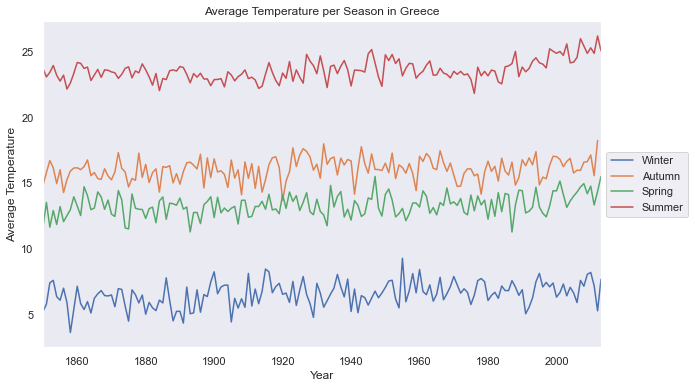

In [51]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 6))

data = gr.unstack(level=1).AverageTemperature
for season in ['Winter', 'Autumn', 'Spring', 'Summer']:
    sns.lineplot(data = data[season], label=season)
plt.xlim(min_year, max_year)
ax.grid(False)
ax.set_ylabel('Average Temperature')
ax.set_xlabel('Year')
ax.set_title('Average Temperature per Season in Greece')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #sns.set(style="whitegrid")
    sns.set(style="ticks")
    f, axes = plt.subplots(4,1, figsize = (10, 10))
    data = gr_ath.unstack(level=1).AverageTemperature
    for num, season in enumerate(seasons):
        sns.lineplot(ax = axes[num], data = data[season],label=season, linewidth=1)

    #dataset for every city to greece
    gr_ath = gr[gr['City'] == 'Athens']
    gr_thes = gr[gr['City'] =='Thessaloníki']
    gr_lar = gr[gr['City'] == 'Lárisa']
    gr_patra = gr[gr['City'] == 'Pátrai']